In [1]:
import warnings

# Ignore all DeprecationWarnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [2]:
# @title
!pip install ucimlrepo

In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
cirrhosis_patient_survival_prediction = fetch_ucirepo(id=878)

# data (as pandas dataframes)
X = cirrhosis_patient_survival_prediction.data.features
y = cirrhosis_patient_survival_prediction.data.targets

# metadata
print(cirrhosis_patient_survival_prediction.metadata)

# variable information
print(cirrhosis_patient_survival_prediction.variables)

{'uci_id': 878, 'name': 'Cirrhosis Patient Survival Prediction', 'repository_url': 'https://archive.ics.uci.edu/dataset/878/cirrhosis+patient+survival+prediction+dataset-1', 'data_url': 'https://archive.ics.uci.edu/static/public/878/data.csv', 'abstract': 'Utilize 17 clinical features for predicting survival state of patients with liver cirrhosis. The survival states include 0 = D (death), 1 = C (censored), 2 = CL (censored due to liver transplantation).', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 418, 'num_features': 17, 'feature_types': ['Real', 'Categorical'], 'demographics': ['Age', 'Sex'], 'target_col': ['Status'], 'index_col': ['ID'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5R02G', 'creators': ['E. Dickson', 'P. Grambsch', 'T. Fleming', 'L. Fisher', 'A. Langworthy'], 'intro_paper': {'ID': 296, 'type'

In [4]:
X

,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261,2.60,156,1718.0,137.95,172,190,12.2,4.0
1,D-penicillamine,20617,F,N,Y,Y,N,1.1,302,4.14,54,7394.8,113.52,88,221,10.6,3.0
2,D-penicillamine,25594,M,N,N,N,S,1.4,176,3.48,210,516.0,96.10,55,151,12.0,4.0
3,D-penicillamine,19994,F,N,Y,Y,S,1.8,244,2.54,64,6121.8,60.63,92,183,10.3,4.0
4,Placebo,13918,F,N,Y,Y,N,3.4,279,3.53,143,671.0,113.15,72,136,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,NaN,24472,F,NaN,NaN,NaN,N,1.2,NaN,2.96,NaN,NaN,NaN,NaN,174,10.9,3.0
414,NaN,14245,F,NaN,NaN,NaN,N,0.9,NaN,3.83,NaN,NaN,NaN,NaN,180,11.2,4.0
415,NaN,20819,F,NaN,NaN,NaN,N,1.6,NaN,3.42,NaN,NaN,NaN,NaN,143,9.9,3.0
416,NaN,21185,F,NaN,NaN,NaN,N,0.8,NaN,3.75,NaN,NaN,NaN,NaN,269,10.4,3.0


In [5]:
y

,Status
0,D
1,C
2,D
3,D
4,CL
...,...
413,D
414,C
415,C
416,C


In [6]:
X.drop(['Drug'], axis=1, inplace=True)
X.drop(['Spiders'], axis=1, inplace=True)
X.drop(['Sex'], axis=1, inplace=True)

X_train = X.iloc[:312, :]
y_train = y.iloc[:312, :]

/tmp/ipython-input-4095932098.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(['Drug'], axis=1, inplace=True)
/tmp/ipython-input-4095932098.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(['Spiders'], axis=1, inplace=True)
/tmp/ipython-input-4095932098.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(['Sex'], axis=1, inplace=True)


In [7]:
y_train.value_counts()

,count
Status,
C,168
D,125
CL,19


In [8]:
matching_indices = y_train[y_train['Status'] == 'CL'].index
y_super_train = y_train.drop(matching_indices)
X_super_train = X_train.drop(matching_indices)

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X_super_train, y_super_train, test_size=0.25, random_state=0)

In [10]:
#@title Data train pre-processing

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
import math
import numpy as np

le = LabelEncoder()

X_copy = X_train.copy(deep=True)

for c in ['Ascites', 'Hepatomegaly', 'Edema']:
  input = X_copy[c].to_numpy().reshape(-1, 1)
  feature_encoded = le.fit_transform(input)
  X_copy[c] = feature_encoded

imp_mean = SimpleImputer(missing_values=np.nan, strategy='median')
for c in X_copy.columns:
  X_copy[c] = X_copy[c].replace({'NaNN': np.nan})
  c_imputed = imp_mean.fit_transform(X_copy[c].to_numpy().reshape(-1, 1))
  X_copy[c] = c_imputed

y_encoded = le.fit_transform(y_train)

X_copy['logBXCopper'] = X_copy['Copper'] * np.log(X_copy['Bilirubin'])
X_copy['logBXProthrombin'] = X_copy['Prothrombin'] * np.log(X_copy['Bilirubin'])

columns = X_copy.columns
X_copy

/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

,Age,Ascites,Hepatomegaly,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,logBXCopper,logBXProthrombin
298,13913.0,0.0,0.0,0.0,2.4,342.0,3.76,90.0,1653.0,150.00,127.0,213.0,10.8,3.0,78.792186,9.455062
102,17884.0,1.0,1.0,2.0,2.5,188.0,3.67,57.0,1273.0,119.35,102.0,110.0,11.1,4.0,52.228572,10.170827
235,14019.0,0.0,1.0,0.0,1.5,253.0,3.79,67.0,1006.0,139.50,106.0,341.0,9.7,3.0,27.166162,3.933012
77,17512.0,0.0,1.0,0.0,6.3,436.0,3.02,75.0,2176.0,170.50,104.0,236.0,10.6,4.0,138.041223,19.509826
141,20354.0,0.0,1.0,0.0,1.0,364.0,3.48,20.0,720.0,134.85,88.0,283.0,9.9,2.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,20567.0,0.0,0.0,0.0,0.5,318.0,3.32,52.0,613.0,70.00,260.0,279.0,10.2,3.0,-36.043653,-7.070101
199,11773.0,0.0,0.0,0.0,4.7,236.0,3.55,112.0,1391.0,137.95,114.0,332.0,9.9,3.0,173.327001,15.320869
121,20248.0,0.0,0.0,0.0,0.6,298.0,4.13,29.0,758.0,65.10,85.0,256.0,10.7,3.0,-14.813943,-5.465834
48,22336.0,0.0,1.0,0.0,0.8,302.0,3.82,58.0,678.0,97.65,107.0,233.0,11.0,4.0,-12.942326,-2.454579


In [11]:
for c in ['Ascites', 'Hepatomegaly', 'Edema']:
  input = X_super_train[c].to_numpy().reshape(-1, 1)
  feature_encoded = le.fit_transform(input)
  X_super_train[c] = feature_encoded

imp_mean = SimpleImputer(missing_values=np.nan, strategy='median')
for c in X_super_train.columns:
  X_super_train[c] = X_super_train[c].replace({'NaNN': np.nan})
  c_imputed = imp_mean.fit_transform(X_super_train[c].to_numpy().reshape(-1, 1))
  X_super_train[c] = c_imputed
X_super_train

/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Age,Ascites,Hepatomegaly,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,21464.0,1.0,1.0,2.0,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,20617.0,0.0,1.0,0.0,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,25594.0,0.0,0.0,1.0,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,19994.0,0.0,1.0,1.0,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
5,24201.0,0.0,1.0,0.0,0.8,248.0,3.98,50.0,944.0,93.00,63.0,253.0,11.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,22347.0,0.0,1.0,0.0,0.4,246.0,3.58,24.0,797.0,91.00,113.0,288.0,10.4,2.0
308,21294.0,0.0,0.0,0.0,0.4,260.0,2.75,41.0,1166.0,70.00,82.0,231.0,10.8,2.0
309,22767.0,0.0,0.0,0.0,1.7,434.0,3.35,39.0,1713.0,171.00,100.0,234.0,10.2,2.0
310,13879.0,0.0,0.0,0.0,2.0,247.0,3.16,69.0,1050.0,117.00,88.0,335.0,10.5,2.0


In [12]:
y_encoded

array([0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0])

In [13]:
median_table = {}
for c in X_copy.columns:
  median_table[c] = X_copy[c].median()

scaler = StandardScaler()
scaler = scaler.fit(X_copy)
X_scaled_copy = scaler.transform(X_copy)
X_scaled_copy

array([[-1.14351232, -0.3082207 , -0.96853141, ..., -0.03111106,
        -0.12694567,  0.24225659],
       [-0.14629168,  3.24442842,  1.03249103, ...,  1.10444263,
        -0.24448108,  0.30161716],
       [-1.11689298, -0.3082207 ,  1.03249103, ..., -0.03111106,
        -0.35537414, -0.21570402],
       ...,
       [ 0.44736976, -0.3082207 , -0.96853141, ..., -0.03111106,
        -0.54112253, -0.99517911],
       [ 0.97172047, -0.3082207 ,  1.03249103, ...,  1.10444263,
        -0.53284123, -0.74544649],
       [-0.60685644, -0.3082207 ,  1.03249103, ...,  1.10444263,
        -0.37414575, -0.05928591]])

<Axes: >

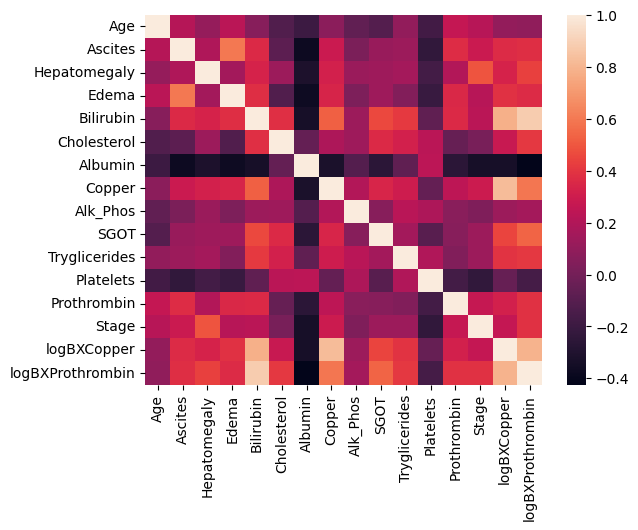

In [14]:
import seaborn as sns
%matplotlib inline

# calculate the correlation matrix on the numeric columns
corr = X_copy.select_dtypes('number').corr()

# plot the heatmap
sns.heatmap(corr)

/tmp/ipython-input-4232209831.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Status'] = y_super_train


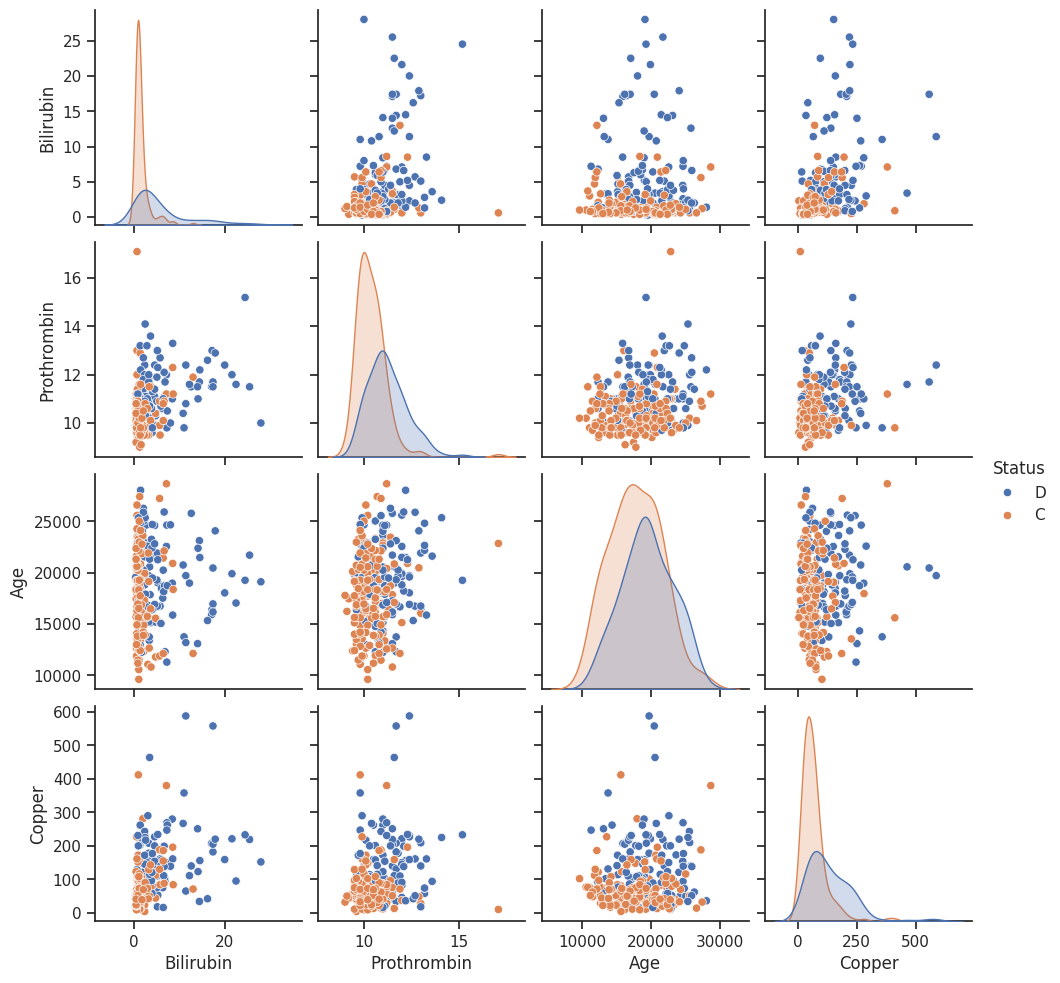

In [15]:
import seaborn as sns
sns.set_theme(style="ticks")

df = X_super_train[['Bilirubin','Prothrombin','Age','Copper']]
df['Status'] = y_super_train
sns.pairplot(df, hue="Status")

In [16]:
#@title Initialize ML classifiers

from multiprocessing import Array
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

names = [
    "Linear SVM",
    "Decision Tree",
    "Logistic Regression",
    "Random Forest",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
    "Gradient"
]

classifiers = [
    LinearSVC(random_state=0),
    DecisionTreeClassifier(max_depth=None, random_state=0),
    LogisticRegression(random_state=0),
    RandomForestClassifier(
        n_estimators=1000, random_state=0
    ),
    AdaBoostClassifier(algorithm="SAMME", random_state=0),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    GradientBoostingClassifier(n_estimators=500, random_state=0)
]

In [17]:
array = []
cv_folds = 20

for i in range(0, len(classifiers)):
  clf = classifiers[i]
  scores = cross_validate(clf, X_scaled_copy, y_encoded, cv=cv_folds, scoring=['roc_auc'])
  array.append(scores)

/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 

In [18]:
import pandas as pd

roc_mean = []
for a in array:
  mean = a['test_roc_auc'].mean()
  roc_mean.append(mean)

results = pd.DataFrame()
results['classifiers'] = classifiers
results['roc_auc'] = roc_mean
results

,classifiers,roc_auc
0,LinearSVC(random_state=0),0.863869
1,DecisionTreeClassifier(random_state=0),0.656131
2,LogisticRegression(random_state=0),0.868869
3,"RandomForestClassifier(n_estimators=1000, rand...",0.871667
4,"AdaBoostClassifier(algorithm='SAMME', random_s...",0.800714
5,GaussianNB(),0.847500
6,QuadraticDiscriminantAnalysis(),0.844702
7,"GradientBoostingClassifier(n_estimators=500, r...",0.826548


In [19]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

clf = RandomForestClassifier(
        n_estimators=1000, random_state=0
    )

clf.fit(X_scaled_copy, y_encoded)
df = pd.DataFrame()
df['feature'] = X_copy.columns
df['coeff'] = clf.feature_importances_
df_sorted = df.sort_values(by='coeff', ascending = False)
df_sorted

,feature,coeff
15,logBXProthrombin,0.140615
14,logBXCopper,0.139503
12,Prothrombin,0.114043
4,Bilirubin,0.091828
7,Copper,0.078741
0,Age,0.075048
8,Alk_Phos,0.058458
9,SGOT,0.055236
6,Albumin,0.050283
5,Cholesterol,0.048260


In [20]:
#@title Data val pre-processing

for c in ['Ascites', 'Hepatomegaly', 'Edema']:
  input = X_val[c].to_numpy().reshape(-1, 1)
  feature_encoded = le.fit_transform(input)
  X_val[c] = feature_encoded

for c in X_val.columns:
  X_val[c] = X_val[c].replace({'NaNN': np.nan})
  X_val[c] = pd.to_numeric(X_val[c])
  median = X_copy[c].median()
  if X_val[c].dtype == 'int64':
    median = int(median)
  imp_mean = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=median)
  c_imputed = imp_mean.fit_transform(X_val[c].to_numpy().reshape(-1, 1))
  X_val[c] = c_imputed

y_val = le.fit_transform(y_val)
X_val['logBXCopper'] = X_val['Copper'] * np.log(X_val['Bilirubin'])
X_val['logBXProthrombin'] = X_val['Prothrombin'] * np.log(X_val['Bilirubin'])
X_scaled_val = scaler.transform(X_val)

/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

Random Forest Model Accuracy on Test Set: 0.8378
[[39  8]
 [ 4 23]]
AUC =  0.8920409771473601


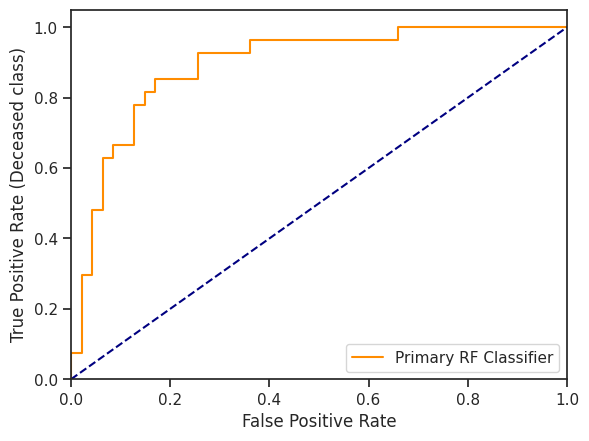

In [21]:
#@title ROC plot

from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix as cm

y_pred = clf.predict(X_scaled_val)

accuracy = accuracy_score(y_val, y_pred)

print(f"Random Forest Model Accuracy on Test Set: {accuracy:.4f}")

cm = confusion_matrix(y_val, y_pred)
print(cm)

y_pred_proba = clf.predict_proba(X_scaled_val)[:, 1]
auc = roc_auc_score(y_val, y_pred_proba)
print("AUC = ", auc)

fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='Primary RF Classifier')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Deceased class)')
plt.legend(loc="lower right")
plt.show()

In [22]:
thresholds_data = pd.DataFrame(data={"TPR": tpr, "FPR": fpr, "Thresholds": thresholds})
thresholds_data

,TPR,FPR,Thresholds
0,0.000000,0.000000,inf
1,0.037037,0.000000,0.978
2,0.074074,0.000000,0.977
3,0.074074,0.021277,0.975
4,0.296296,0.021277,0.921
5,0.296296,0.042553,0.888
6,0.481481,0.042553,0.781
7,0.481481,0.063830,0.765
8,0.629630,0.063830,0.737
9,0.629630,0.085106,0.734


In [23]:
thresh1 = 0.5
predicted_labels = np.array([1 if p >= thresh1 else 0 for p in y_pred_proba])
confusion_matrix(y_val, predicted_labels)

array([[39,  8],
       [ 4, 23]])

In [24]:
#@title Compute RF metrics

import scipy.stats as st

def get_variance(scores):
  return np.var(scores)

def get_confidence_interval(scores):
  # Calculate sample statistics
  sample_mean = np.mean(scores) # loc
  sample_size = len(scores) # df + 1
  standard_error = st.sem(scores) # scale

  # Calculate the 95% confidence interval for the mean
  confidence_interval = st.t.interval(0.95, sample_size - 1, sample_mean, standard_error)
  return confidence_interval

def get_dotproduct_sum(clf, point):
  dps_array = []
  var_array = []
  ci_array = []

  for p in point:
    probs_vector = []
    for tree in clf.estimators_:
      probs = tree.predict_proba(p.reshape(1, -1))
      probs_vector.append(probs.reshape(-1))

    sum = 0
    for i in range(len(probs_vector)):
      p1 = probs_vector[i]
      for j in range(i+1, len(probs_vector)):
        p2 = probs_vector[j]
        sum += np.dot(p1, p2).item()

    scores = [x[1] for x in probs_vector]
    var = get_variance(scores)
    ci = get_confidence_interval(scores)
    dps_array.append(sum)
    var_array.append(var)
    ci_array.append(ci[0])

  return (dps_array, var_array, ci_array)

In [25]:
#@title Confidence

from sklearn.model_selection import cross_val_predict, KFold

clf = RandomForestClassifier(
        n_estimators=100, random_state=0
    )

# Arrays to store predictions and original indices
y_pred_proba = np.zeros((len(X_copy), 2))
dps_array = np.zeros(len(X_copy))
var_array = np.zeros(len(X_copy))
ci_array = np.zeros(len(X_copy))

# Define the splitter
kf = KFold(n_splits=20, shuffle=True, random_state=42)
for train_index, test_index in kf.split(X_copy):
  train_x, test_x = X_scaled_copy[train_index], X_scaled_copy[test_index]
  train_y, test_y = y_encoded[train_index], y_encoded[test_index]
  clf.fit(train_x, train_y)
  probs = clf.predict_proba(test_x)
  y_pred_proba[test_index] = probs
  (dps, var, ci) = get_dotproduct_sum(clf, test_x)
  dps_array[test_index] = dps
  var_array[test_index] = var
  ci_array[test_index] = ci

y_pred = [1 if x >= thresh1 else 0 for x in y_pred_proba[:, 1]]
correct_or_incorrect_train = [1 if x == y else 0 for x, y in zip(y_pred, y_encoded)]
unique_values, counts = np.unique(correct_or_incorrect_train, return_counts=True)
print(unique_values)
print(counts)

/usr/local/lib/python3.12/dist-packages/scipy/stats/_distn_infrastructure.py:2323: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/usr/local/lib/python3.12/dist-packages/scipy/stats/_distn_infrastructure.py:2324: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


[0 1]
[ 43 176]


In [26]:
correct_clf = RandomForestClassifier(
        n_estimators=500, max_depth=3, random_state=0, class_weight='balanced'
    )

correct_df = pd.DataFrame()
correct_df['D'] = y_pred_proba[:, 1]
correct_df['Var'] = var_array
correct_df['CI'] = ci_array
correct_df['DCI'] = correct_df['D'] * correct_df['CI']

columns = ['Alk_Phos','Age']
for c in columns:
  correct_df[c] = X_copy[c].reset_index(drop=True)
correct_df['Dage'] = correct_df['D'] * correct_df['Age']
correct_clf.fit(correct_df, correct_or_incorrect_train)

clf = RandomForestClassifier(
        n_estimators=1000, random_state=0
)
clf.fit(X_scaled_copy, y_encoded)
y_pred_proba_test = clf.predict_proba(X_scaled_val)
y_pred_test = [1 if x >= thresh1 else 0 for x in y_pred_proba_test[:,1]]
(dps, var, ci) = get_dotproduct_sum(clf, X_scaled_val)

correct_test_df = pd.DataFrame()
correct_test_df['D'] = y_pred_proba_test[:, 1]
correct_test_df['Var'] = var
correct_test_df['CI'] = ci
correct_test_df['DCI'] = correct_test_df['D'] * correct_test_df['CI']

for c in columns:
  correct_test_df[c] = X_val[c].reset_index(drop=True)
correct_test_df['Dage'] = correct_test_df['D'] * correct_test_df['Age']

y_pred_correct = correct_clf.predict_proba(correct_test_df)[:,1]
correct_or_incorrect = [1 if x == y else 0 for x, y in zip(y_pred_test, y_val)]
#correct_df['Correct'] = correct_or_incorrect_train
#correct_df['true'] = y_encoded

In [27]:
#df = correct_df[['DPS','Var','CI','Age','Dage','Alk_Phos','D','Correct']]
#sns.pairplot(df, hue="Correct")

In [28]:
df = pd.DataFrame()
df['feature'] = correct_df.columns
df['coeff'] = correct_clf.feature_importances_
df_sorted = df.sort_values(by='coeff', ascending = False)
df_sorted

,feature,coeff
6,Dage,0.225604
4,Alk_Phos,0.181456
5,Age,0.147481
1,Var,0.135376
2,CI,0.115848
0,D,0.099837
3,DCI,0.094398


AUC =  0.7110215053763441


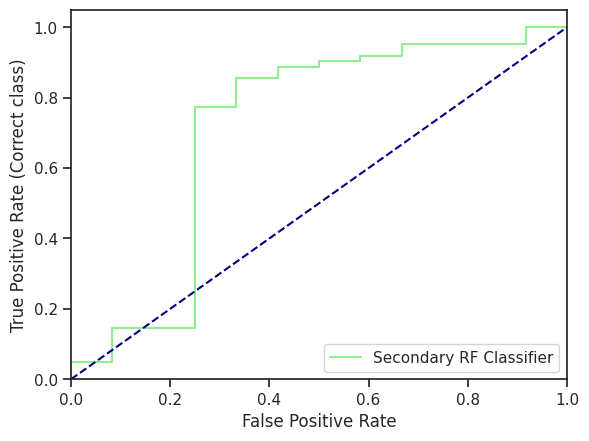

In [29]:
auc = roc_auc_score(correct_or_incorrect, y_pred_correct)
print("AUC = ", auc)

fpr, tpr, thresholds = roc_curve(correct_or_incorrect, y_pred_correct)

plt.figure()
plt.plot(fpr, tpr, color='lightgreen', label='Secondary RF Classifier')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Correct class)')
plt.legend(loc="lower right")
plt.show()

In [30]:
thresholds_data = pd.DataFrame(data={"TPR": tpr, "FPR": fpr, "Thresholds": thresholds})
thresholds_data

,TPR,FPR,Thresholds
0,0.000000,0.000000,inf
1,0.016129,0.000000,0.864484
2,0.048387,0.000000,0.852817
3,0.048387,0.083333,0.846525
4,0.145161,0.083333,0.794965
5,0.145161,0.250000,0.782228
6,0.774194,0.250000,0.537848
7,0.774194,0.333333,0.525114
8,0.854839,0.333333,0.451893
9,0.854839,0.416667,0.450587


In [31]:
thresh2 = 0.4511
predicted_labels = np.array([1 if p >= thresh2 else 0 for p in y_pred_correct])
confusion_matrix(correct_or_incorrect, predicted_labels)

array([[ 8,  4],
       [ 9, 53]])

In [32]:
#@title Data test-processing

from sklearn.ensemble import RandomForestRegressor

le = LabelEncoder()

X_test = X.iloc[-106:, :]
y_test = y.iloc[-106:, :]

matching_indices = y_test[y_test['Status'] == 'CL'].index
y_test = y_test.drop(matching_indices)
X_test = X_test.drop(matching_indices)

y_test.value_counts()

X_test_copy = X_test.copy(deep=True)

for c in ['Edema']:
  input = X_test_copy[c].to_numpy().reshape(-1, 1)
  feature_encoded = le.fit_transform(input)
  X_test_copy[c] = feature_encoded

# Impute missing values using regression
features = ['Age', 'Edema', 'Bilirubin', 'Albumin', 'Platelets', 'Prothrombin']
targets = ['Copper', 'Alk_Phos', 'Cholesterol', 'SGOT', 'Tryglicerides']

X_train_lin_reg = X_super_train[features]
lin_reg_model = RandomForestRegressor(random_state=0)

for target in targets:
  y_train_lin_reg = X_super_train[target]
  lin_reg_model.fit(X_train_lin_reg, y_train_lin_reg)
  nan_indices = X_test_copy[X_test_copy[target].isna()].index
  X_test_copper_nan = X_test_copy.loc[nan_indices, features]
  predicted_copper_values = lin_reg_model.predict(X_test_copper_nan)
  X_test_copy.loc[nan_indices, target] = predicted_copper_values

# Impute missing values using median
for c in X_test_copy.columns:
  X_test_copy[c] = X_test_copy[c].replace({'NaNN': np.nan})
  X_test_copy[c] = pd.to_numeric(X_test_copy[c])
  median = X_super_train[c].median()
  if X_test_copy[c].dtype == 'int64':
    median = int(median)
  imp_mean = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=median)
  c_imputed = imp_mean.fit_transform(X_test_copy[c].to_numpy().reshape(-1, 1))
  X_test_copy[c] = c_imputed

y_test_encoded = le.fit_transform(y_test)

X_test_copy['logBXCopper'] = X_test_copy['Copper'] * np.log(X_test_copy['Bilirubin'])
X_test_copy['logBXProthrombin'] = X_test_copy['Prothrombin'] * np.log(X_test_copy['Bilirubin'])
print(X_test_copy)
X_test_scaled_copy = scaler.transform(X_test_copy)

/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


       Age  Ascites  Hepatomegaly  Edema  Bilirubin  Cholesterol  Albumin  \
312  21915      0.0           1.0      0        0.7       336.69     3.65   
313  23741      0.0           1.0      1        1.4       288.12     3.04   
314  19724      0.0           1.0      0        0.7       252.99     4.03   
315  27394      0.0           1.0      1        0.7       261.83     3.96   
316  22646      0.0           1.0      0        0.8       294.93     2.48   
..     ...      ...           ...    ...        ...          ...      ...   
413  24472      0.0           1.0      0        1.2       376.65     2.96   
414  14245      0.0           1.0      0        0.9       395.83     3.83   
415  20819      0.0           1.0      0        1.6       325.15     3.42   
416  21185      0.0           1.0      0        0.8       304.86     3.75   
417  19358      0.0           1.0      0        0.7       319.64     3.29   

     Copper  Alk_Phos      SGOT  Tryglicerides  Platelets  Prothrombin  Sta

/tmp/ipython-input-2313988043.py:40: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_test_copy[c] = X_test_copy[c].replace({'NaNN': np.nan})
/usr/local/lib/python3.12/dist-packages/sklearn/impute/_base.py:572: FutureWarning: Currently, when `keep_empty_feature=False` and `strategy="constant"`, empty features are not dropped. This behaviour will change in version 1.8. Set `keep_empty_feature=True` to preserve this behaviour.
  warnings.warn(
/tmp/ipython-input-2313988043.py:40: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_test_c

In [33]:
y_pred_proba = clf.predict_proba(X_test_scaled_copy)[:, 1]
predicted_labels = np.array([1 if p >= thresh1 else 0 for p in y_pred_proba])
confusion_matrix(y_test_encoded, predicted_labels)

array([[48, 16],
       [10, 26]])

In [34]:
y_pred_proba_test = clf.predict_proba(X_test_scaled_copy)
y_pred_test = [1 if x >= thresh1 else 0 for x in y_pred_proba_test[:,1]]
(dps, var, ci) = get_dotproduct_sum(clf, X_test_scaled_copy)
correct_test_df = pd.DataFrame()
correct_test_df['D'] = y_pred_proba_test[:, 1]
correct_test_df['Var'] = var
correct_test_df['CI'] = ci
correct_test_df['DCI'] = correct_test_df['D'] * correct_test_df['CI']

for c in columns:
  correct_test_df[c] = X_test_copy[c].reset_index(drop=True)
correct_test_df['Dage'] = correct_test_df['D'] * correct_test_df['Age']

y_pred_correct = correct_clf.predict_proba(correct_test_df)[:,1]
correct_or_incorrect = [1 if x == y else 0 for x, y in zip(y_pred_test, y_test_encoded)]

In [35]:
predicted_labels = np.array([1 if p >= thresh2 else 0 for p in y_pred_correct])
confusion_matrix(correct_or_incorrect, predicted_labels)

array([[ 9, 17],
       [12, 62]])

In [36]:
df = X_test.copy(deep=True)
df

,Age,Ascites,Hepatomegaly,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
312,21915,NaNN,NaNN,N,0.7,NaN,3.65,NaN,NaN,NaN,NaN,378,11.0,NaN
313,23741,NaN,NaN,S,1.4,NaN,3.04,NaN,NaN,NaN,NaN,331,12.1,4.0
314,19724,NaN,NaN,N,0.7,NaN,4.03,NaN,NaN,NaN,NaN,226,9.8,4.0
315,27394,NaN,NaN,S,0.7,NaN,3.96,NaN,NaN,NaN,NaN,NaN,11.3,4.0
316,22646,NaN,NaN,N,0.8,NaN,2.48,NaN,NaN,NaN,NaN,273,10.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,24472,NaN,NaN,N,1.2,NaN,2.96,NaN,NaN,NaN,NaN,174,10.9,3.0
414,14245,NaN,NaN,N,0.9,NaN,3.83,NaN,NaN,NaN,NaN,180,11.2,4.0
415,20819,NaN,NaN,N,1.6,NaN,3.42,NaN,NaN,NaN,NaN,143,9.9,3.0
416,21185,NaN,NaN,N,0.8,NaN,3.75,NaN,NaN,NaN,NaN,269,10.4,3.0
